In [178]:
df = pd.read_csv('./vendas2024.csv')

# Criando a tabela pivot para somar a quantidade pedida de cada grupo por cliente
pivot_table = pd.pivot_table(df, 
                             values='QTDE_PEDIDA', 
                             index='id_cliente', 
                             columns='ID_GRUPO', 
                             aggfunc='sum', 
                             fill_value=0)
# Resetando o índice
pivot_table_reset = pivot_table.reset_index()
pivot_table_reset


ID_GRUPO  id_cliente      4      5       6      7    8      9      10     11  \
0                 16    0.0    0.0     0.0    0.0  0.0    6.0     0.0    0.0   
1                 47    5.0    6.0     9.0   26.0  8.0    0.0     6.0    0.0   
2                 75  172.0  499.0  1357.0  196.0  4.0  598.0  1274.0  730.0   
3                126    0.0    4.0    13.0    0.0  0.0    0.0     0.0    0.0   
4                265    3.0   13.0    20.0    5.0  0.0   12.0    44.0   16.0   
...              ...    ...    ...     ...    ...  ...    ...     ...    ...   
3759           55857    0.0    0.0     0.0    0.0  0.0    7.0    10.0    0.0   
3760           55859   23.0    9.0     0.0    0.0  0.0    0.0     0.0    0.0   
3761           55865    0.0    0.0    12.0    0.0  0.0    0.0     0.0    0.0   
3762           55870    0.0    0.0     0.0    0.0  0.0    0.0     0.0    0.0   
3763           55873    0.0    9.0    24.0    0.0  0.0    9.0    79.0   36.0   

ID_GRUPO     12  ...     16    17      18      21     22    23  10000  10004  \
0          12.0  ...    0.0   0.0    12.0    66.0    0.0   0.0    0.0    0.0   
1           0.0  ...    0.0   0.0    22.0    85.0    0.0   0.0    0.0    0.0   
2         220.0  ...  178.0  26.0  2001.0  2276.0  476.0  40.0    3.0    6.0   
3           2.0  ...    0.0   0.0     0.0     0.0    0.0   2.0    0.0    0.0   
4          24.0  ...   22.0   0.0    16.0    84.0   20.0   0.0    0.0    0.0   
...         ...  ...    ...   ...     ...     ...    ...   ...    ...    ...   
3759        0.0  ...    0.0   0.0     0.0   340.0    0.0   0.0    0.0    0.0   
3760        0.0  ...    0.0   0.0    33.0     0.0    0.0   0.0    0.0    0.0   
3761        0.0  ...    0.0   0.0    18.0     0.0    0.0   0.0    0.0    0.0   
3762        0.0  ...    0.0   0.0    50.0     0.0    0.0   0.0    0.0    0.0   
3763        0.0  ...    0.0   0.0    45.0    53.0    0.0   0.0    0.0    0.0   

ID_GRUPO  10006  10007  
0           0.0    0.0  
1           0.0    0.0  
2         137.0  101.0  
3           0.0    0.0  
4           0.0    0.0  
...         ...    ...  
3759        0.0    0.0  
3760        0.0    0.0  
3761        0.0    0.0  
3762        0.0    0.0  
3763        0.0    0.0  

[3764 rows x 23 columns]

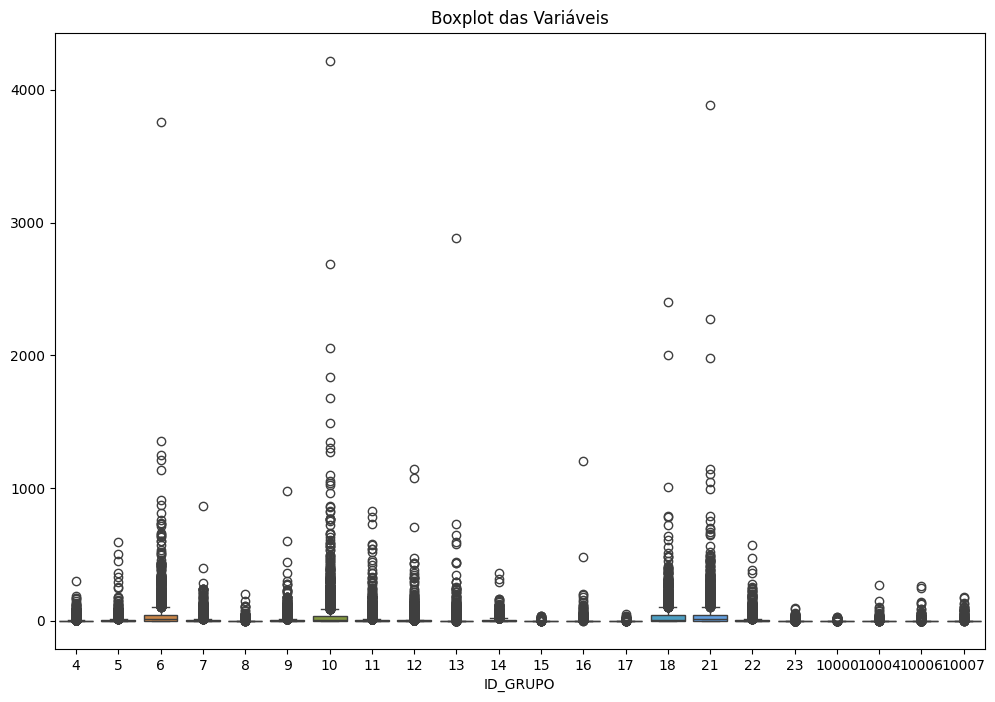

In [179]:
# Plotando boxplots para visualizar os outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=pivot_table_reset.drop(columns=['id_cliente']))
plt.title('Boxplot das Variáveis')
plt.show()

In [200]:
# Visualizando a tabela pivot resultante
# Ajustando os valores dos grupos para um máximo de 55
pivot_table_reset = pivot_table_reset.clip(upper=60)
pivot_table = pivot_table.clip(upper=60)

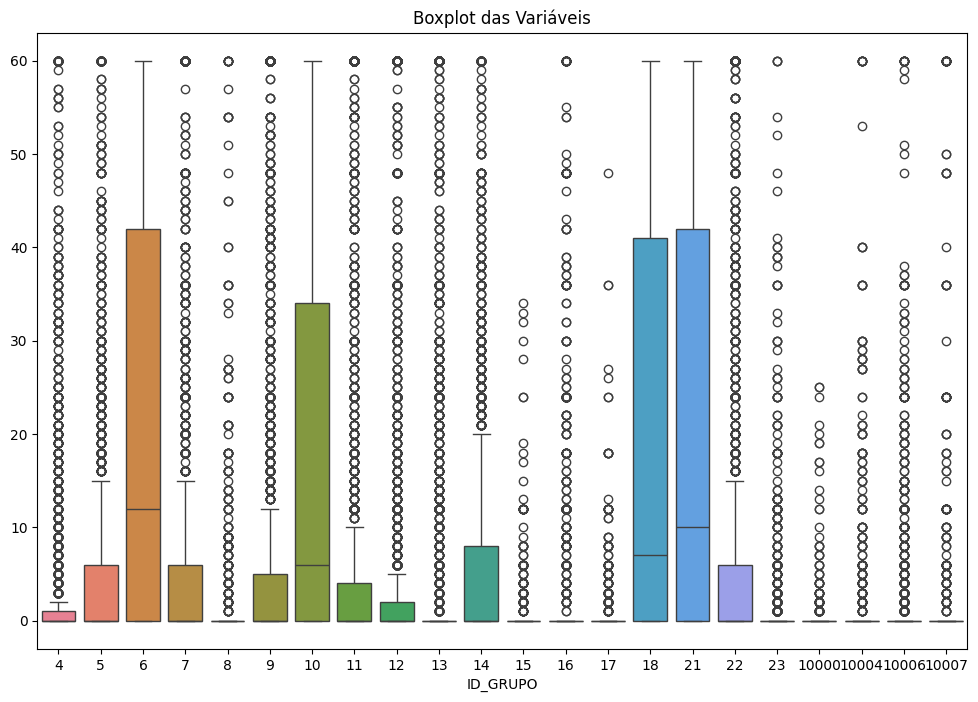

In [181]:
# Plotando boxplots para visualizar os outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=pivot_table_reset.drop(columns=['id_cliente']))
plt.title('Boxplot das Variáveis')
plt.show()

array([[<Axes: title={'center': 'id_cliente'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>],
       [<Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>,
        <Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>],
       [<Axes: title={'center': '18'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '10000'}>],
       [<Axes: title={'center': '10004'}>,
        <Axes: title={'center': '10006'}>,
        <Axes: title={'center': '10007'}>, <Axes: >, <Axes: >]],
      dtype=object)

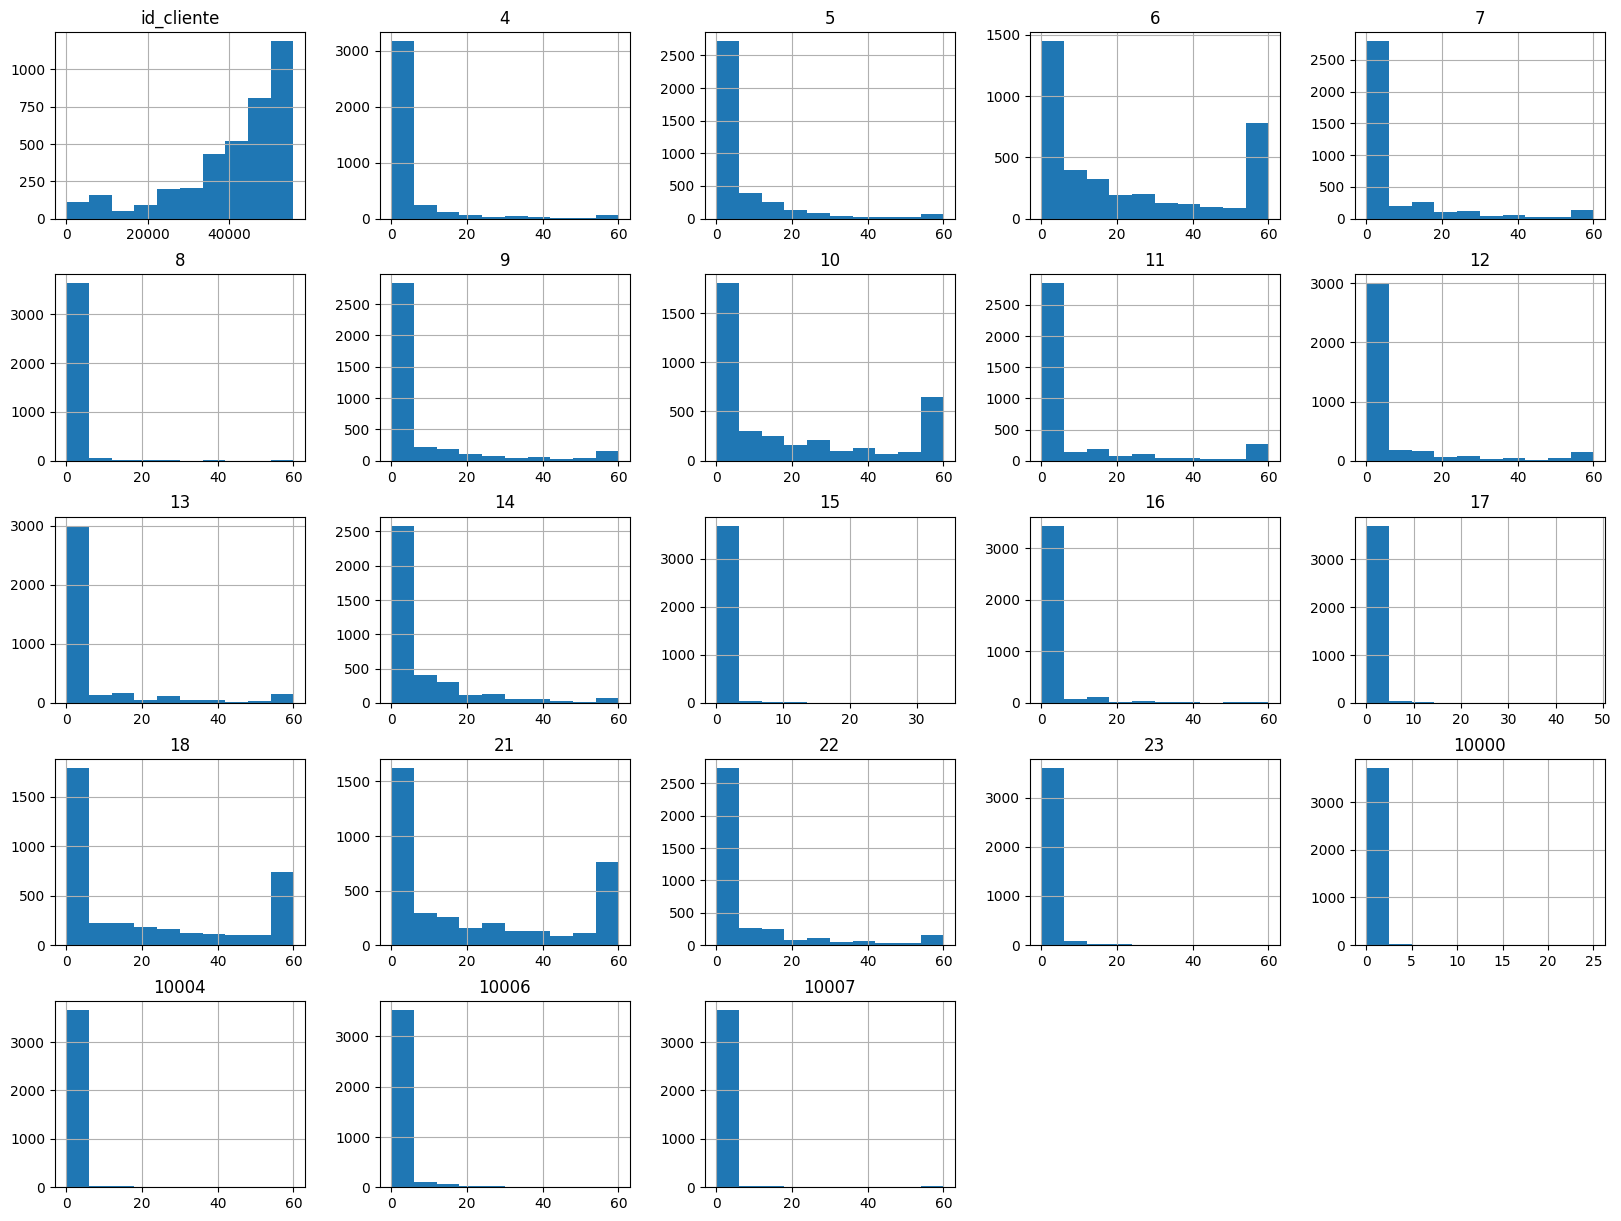

In [163]:
pivot_table_reset.hist(figsize=(20,15))


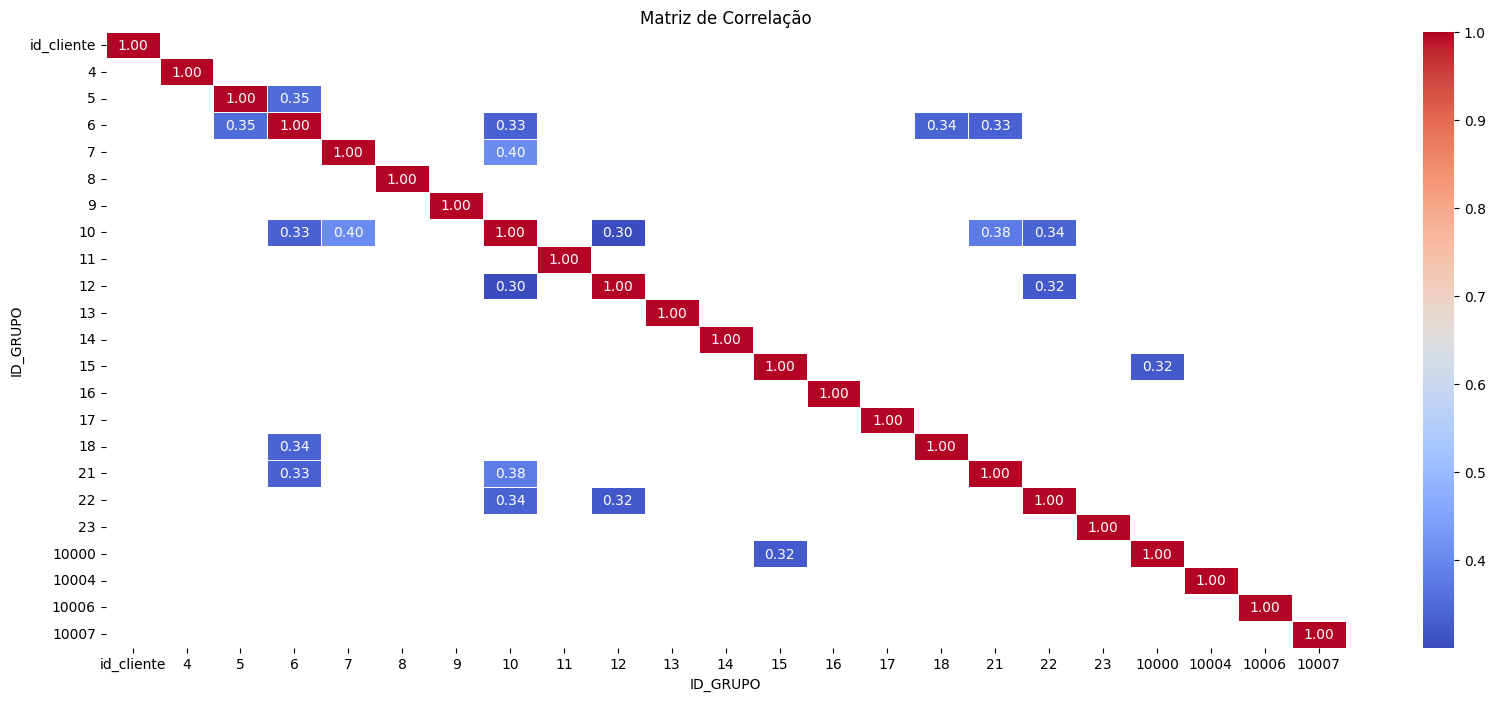

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Visualização da matriz de correlação

matriz_corr = pivot_table_reset.corr()

# Criando uma máscara para ocultar valores menores ou iguais a 0.25
mask = np.abs(matriz_corr) <= 0.3

# Aplicando a máscara à matriz de correlação
matriz_corr_filtrada = matriz_corr.mask(mask)


plt.figure(figsize=(20, 8))
sns.heatmap(matriz_corr_filtrada, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


d:\python\Faculdade\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\python\Faculdade\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\python\Faculdade\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\python\Faculdade\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\python\Faculdade\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
d:\python\Faculdade\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` bec

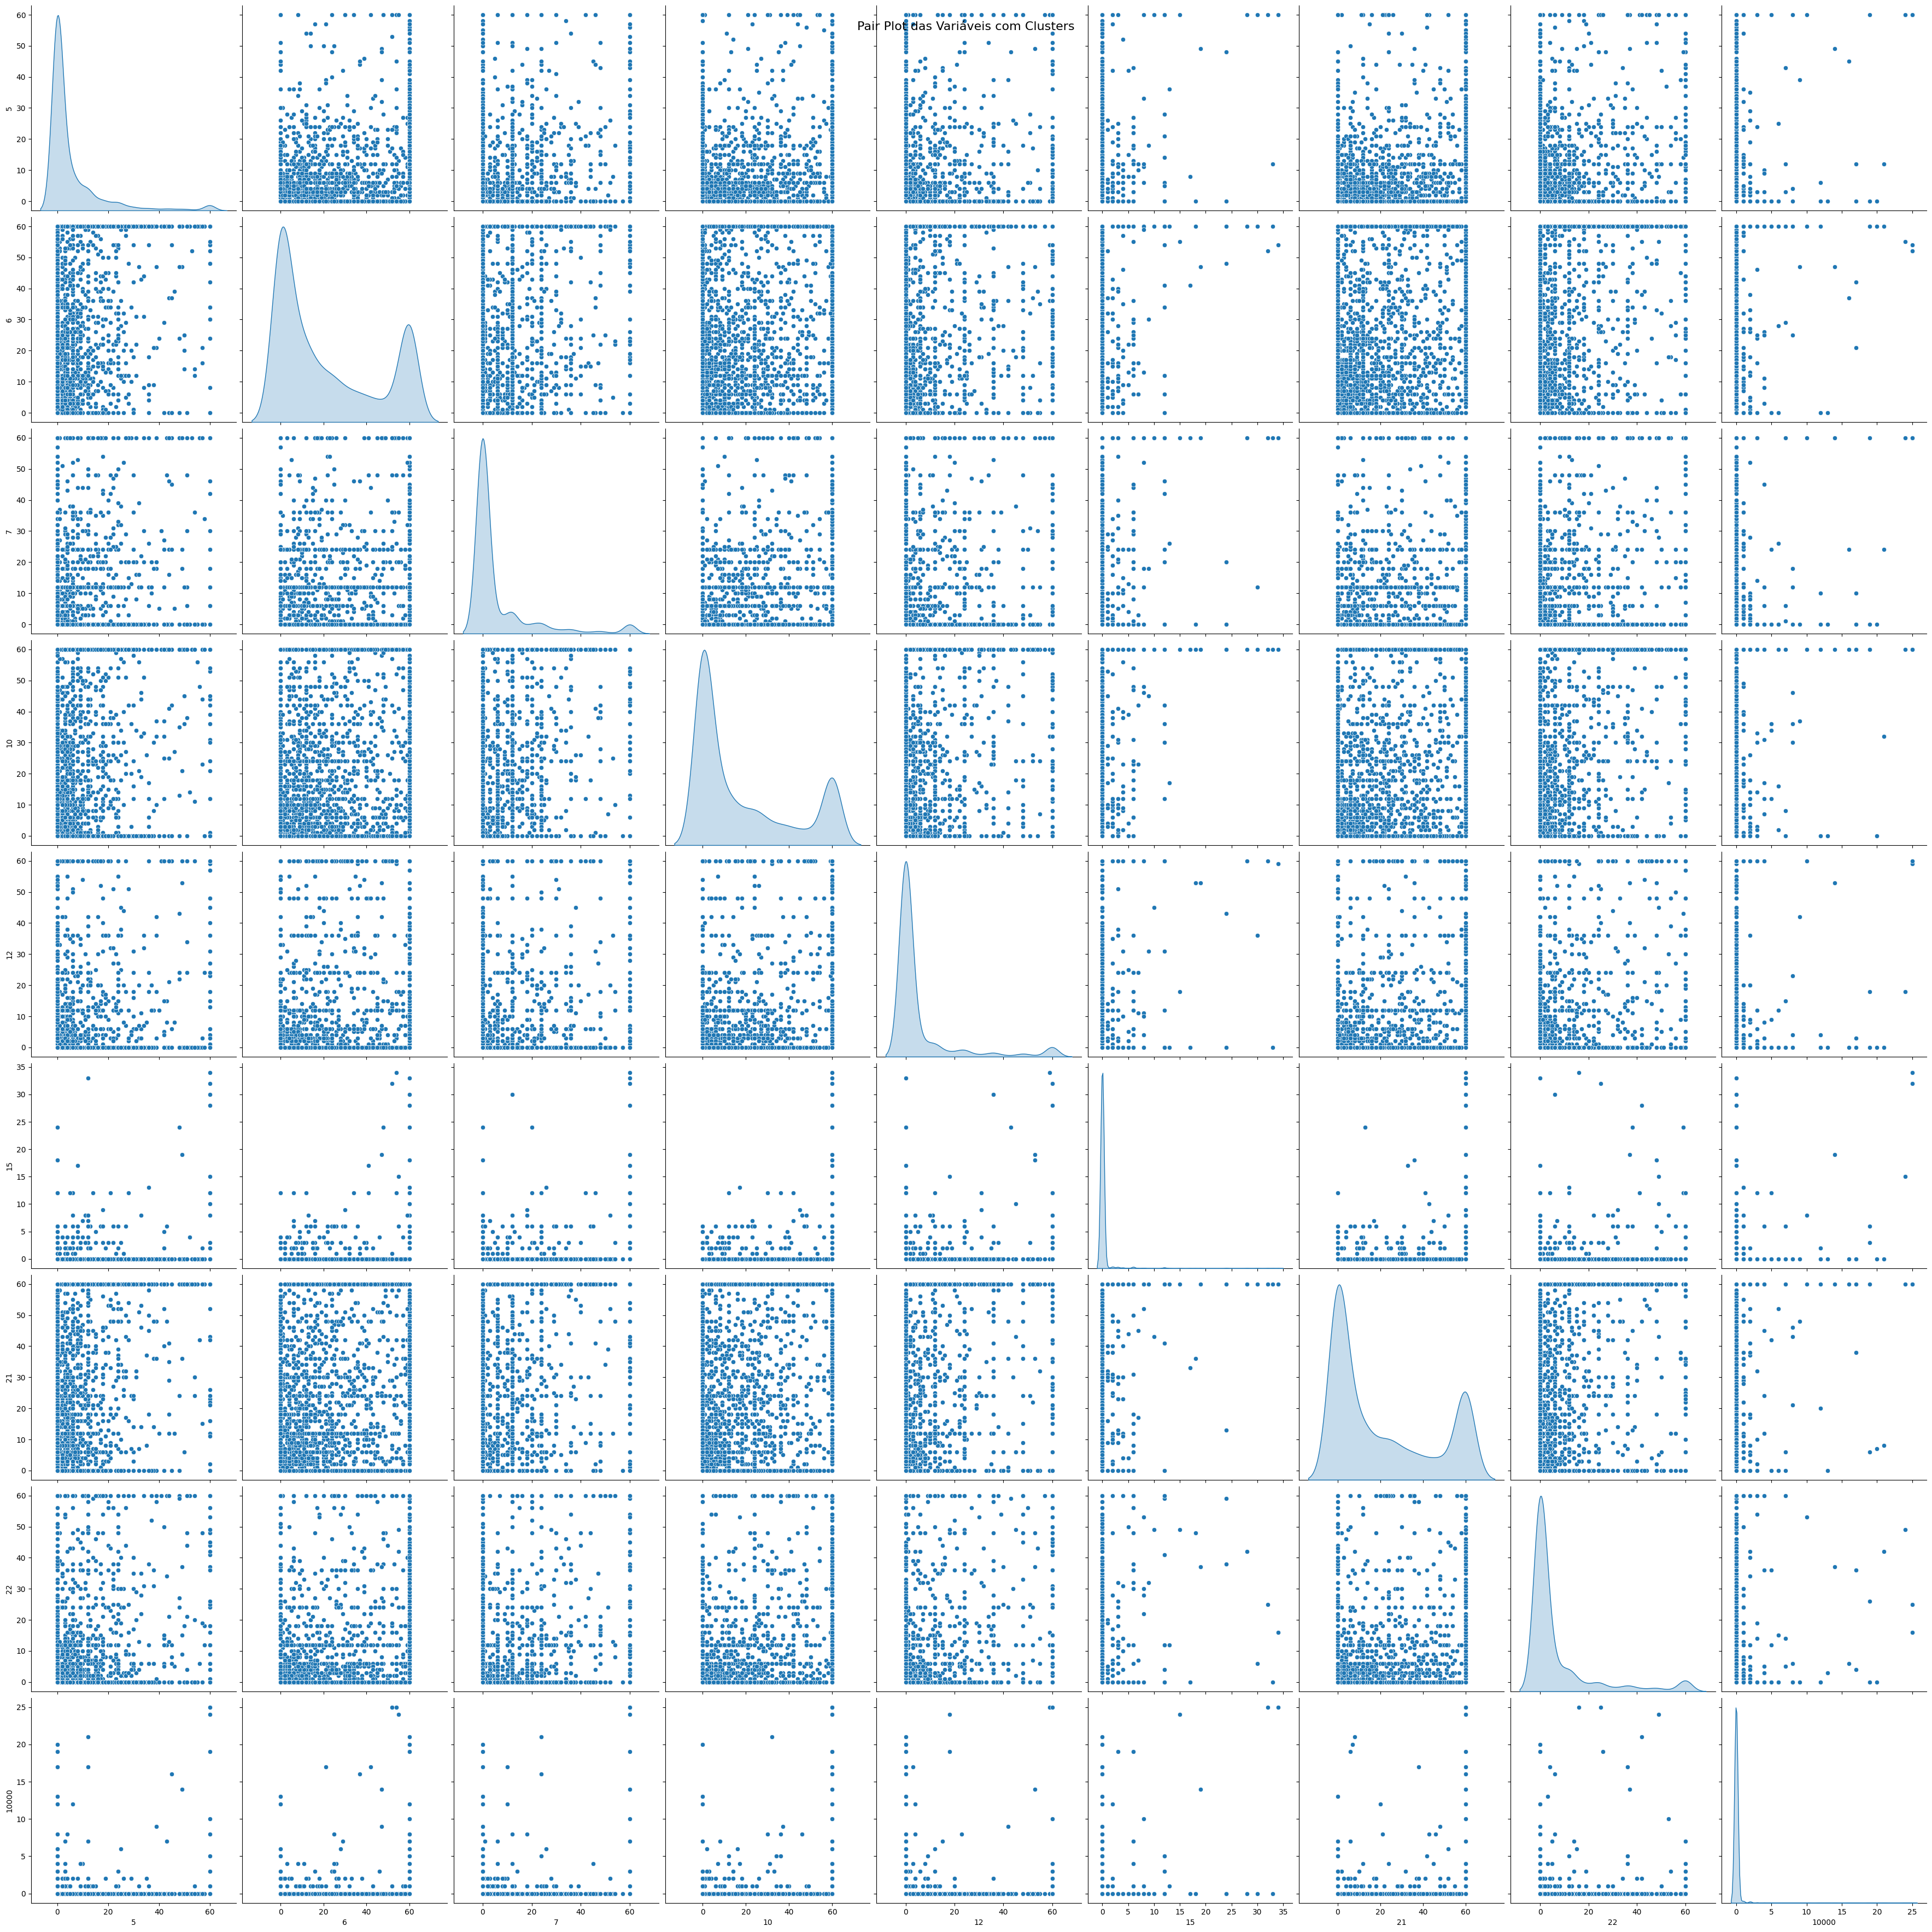

In [165]:
# Selecionando apenas duas colunas para o pair plot, além da coluna de cluster
columns_to_plot = [5,6,7,10,12,15,21,22,10000]
subset_data = pivot_table[columns_to_plot]

# Criando o pair plot para as duas colunas selecionadas
sns.pairplot(subset_data, palette='viridis', diag_kind='kde', markers='o', height=4)
plt.suptitle('Pair Plot das Variáveis com Clusters', fontsize=16)
plt.show()

In [166]:
columns_to_filter = [5,6,7,10,12,15,21,22,10000]
pivot_table_reset[columns_to_filter]


ID_GRUPO     5     6     7    10    12    15    21    22  10000
0          0.0   0.0   0.0   0.0  12.0   0.0  60.0   0.0    0.0
1          6.0   9.0  26.0   6.0   0.0   0.0  60.0   0.0    0.0
2         60.0  60.0  60.0  60.0  60.0  12.0  60.0  60.0    3.0
3          4.0  13.0   0.0   0.0   2.0   0.0   0.0   0.0    0.0
4         13.0  20.0   5.0  44.0  24.0   0.0  60.0  20.0    0.0
...        ...   ...   ...   ...   ...   ...   ...   ...    ...
3759       0.0   0.0   0.0  10.0   0.0   0.0  60.0   0.0    0.0
3760       9.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3761       0.0  12.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3762       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3763       9.0  24.0   0.0  60.0   0.0   0.0  53.0   0.0    0.0

[3764 rows x 9 columns]

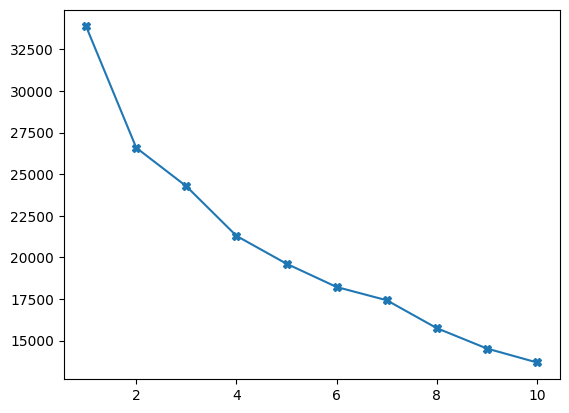

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pivot_table_scaled = scaler.fit_transform(pivot_table_reset[columns_to_filter])

inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(pivot_table_scaled)
    inertia.append((i,kmeans.inertia_,))

plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

In [185]:
pivot_table_reset[columns_to_filter] 

ID_GRUPO     5     6     7    10    12    15    21    22  10000
0          0.0   0.0   0.0   0.0  12.0   0.0  60.0   0.0    0.0
1          6.0   9.0  26.0   6.0   0.0   0.0  60.0   0.0    0.0
2         60.0  60.0  60.0  60.0  60.0  12.0  60.0  60.0    3.0
3          4.0  13.0   0.0   0.0   2.0   0.0   0.0   0.0    0.0
4         13.0  20.0   5.0  44.0  24.0   0.0  60.0  20.0    0.0
...        ...   ...   ...   ...   ...   ...   ...   ...    ...
3759       0.0   0.0   0.0  10.0   0.0   0.0  60.0   0.0    0.0
3760       9.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3761       0.0  12.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3762       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0
3763       9.0  24.0   0.0  60.0   0.0   0.0  53.0   0.0    0.0

[3764 rows x 9 columns]

In [213]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Normalizando os dados
scaler = StandardScaler()
pivot_table_scaled = scaler.fit_transform(pivot_table_reset[columns_to_filter] )

# Aplicando o K-Means
kmeans = KMeans(n_clusters=7, random_state=42 ,init='k-means++', n_init=10)
kmeans.fit(pivot_table_scaled)

# Adicionando os labels dos clusters ao DataFrame original
pivot_table['Cluster'] = kmeans.labels_

# Visualizando os clusters
print(pivot_table.head())

# Analisando os centros dos clusters
print(kmeans.cluster_centers_)
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
# Calculando a média dos valores para cada cluster
cluster_means = pivot_table.groupby('Cluster').mean()



ID_GRUPO       4     5     6     7    8     9    10    11    12    13  ...  \
id_cliente                                                             ...   
16           0.0   0.0   0.0   0.0  0.0   6.0   0.0   0.0  12.0   0.0  ...   
47           5.0   6.0   9.0  26.0  8.0   0.0   6.0   0.0   0.0   0.0  ...   
75          60.0  60.0  60.0  60.0  4.0  60.0  60.0  60.0  60.0  60.0  ...   
126          0.0   4.0  13.0   0.0  0.0   0.0   0.0   0.0   2.0   6.0  ...   
265          3.0  13.0  20.0   5.0  0.0  12.0  44.0  16.0  24.0  20.0  ...   

ID_GRUPO      17    18    21    22    23  10000  10004  10006  10007  Cluster  
id_cliente                                                                     
16           0.0  12.0  60.0   0.0   0.0    0.0    0.0    0.0    0.0        2  
47           0.0  22.0  60.0   0.0   0.0    0.0    0.0    0.0    0.0        2  
75          26.0  60.0  60.0  60.0  40.0    3.0    6.0   60.0   60.0        1  
126          0.0   0.0   0.0   0.0   2.0    0.0    0.

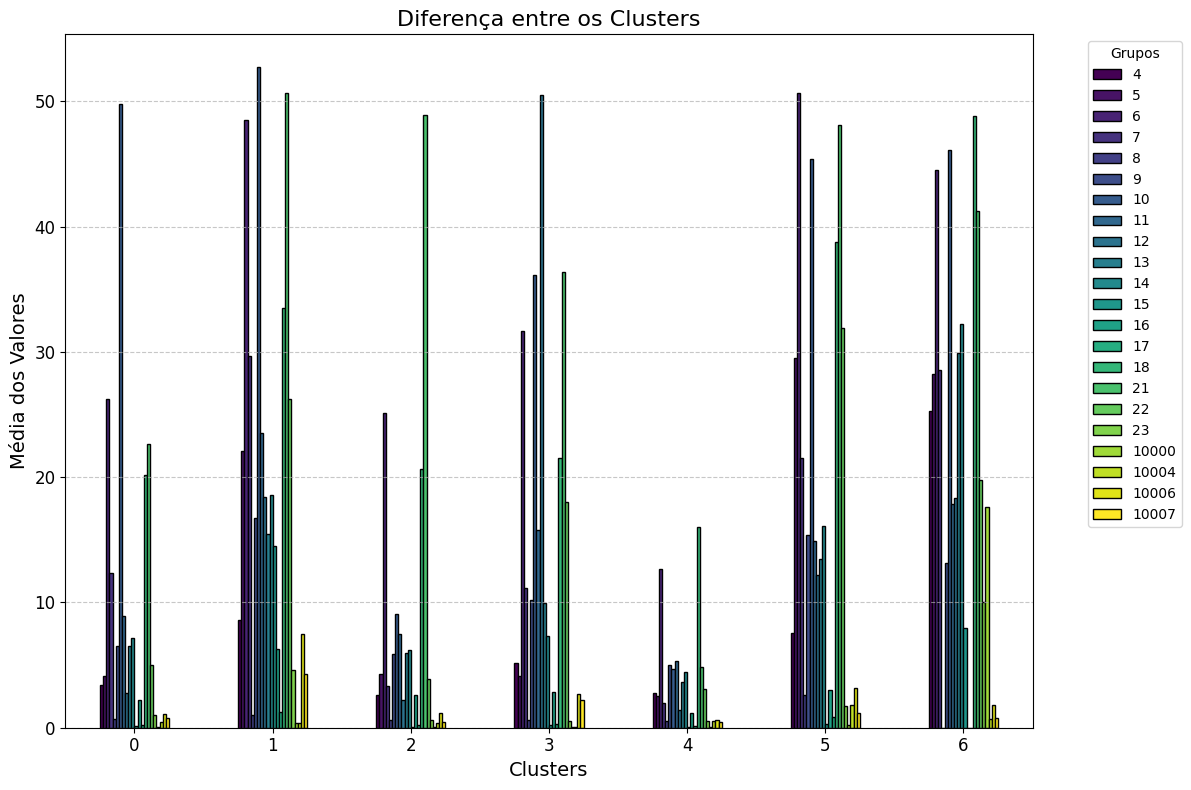

In [214]:
# Calculando a média dos grupos por cluster
cluster_means = pivot_table.groupby('Cluster').mean()

# Plotando o gráfico de barras
ax = cluster_means.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')

# Adicionando rótulos e título
plt.title('Diferença entre os Clusters', fontsize=16)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Média dos Valores', fontsize=14)
plt.legend(title='Grupos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

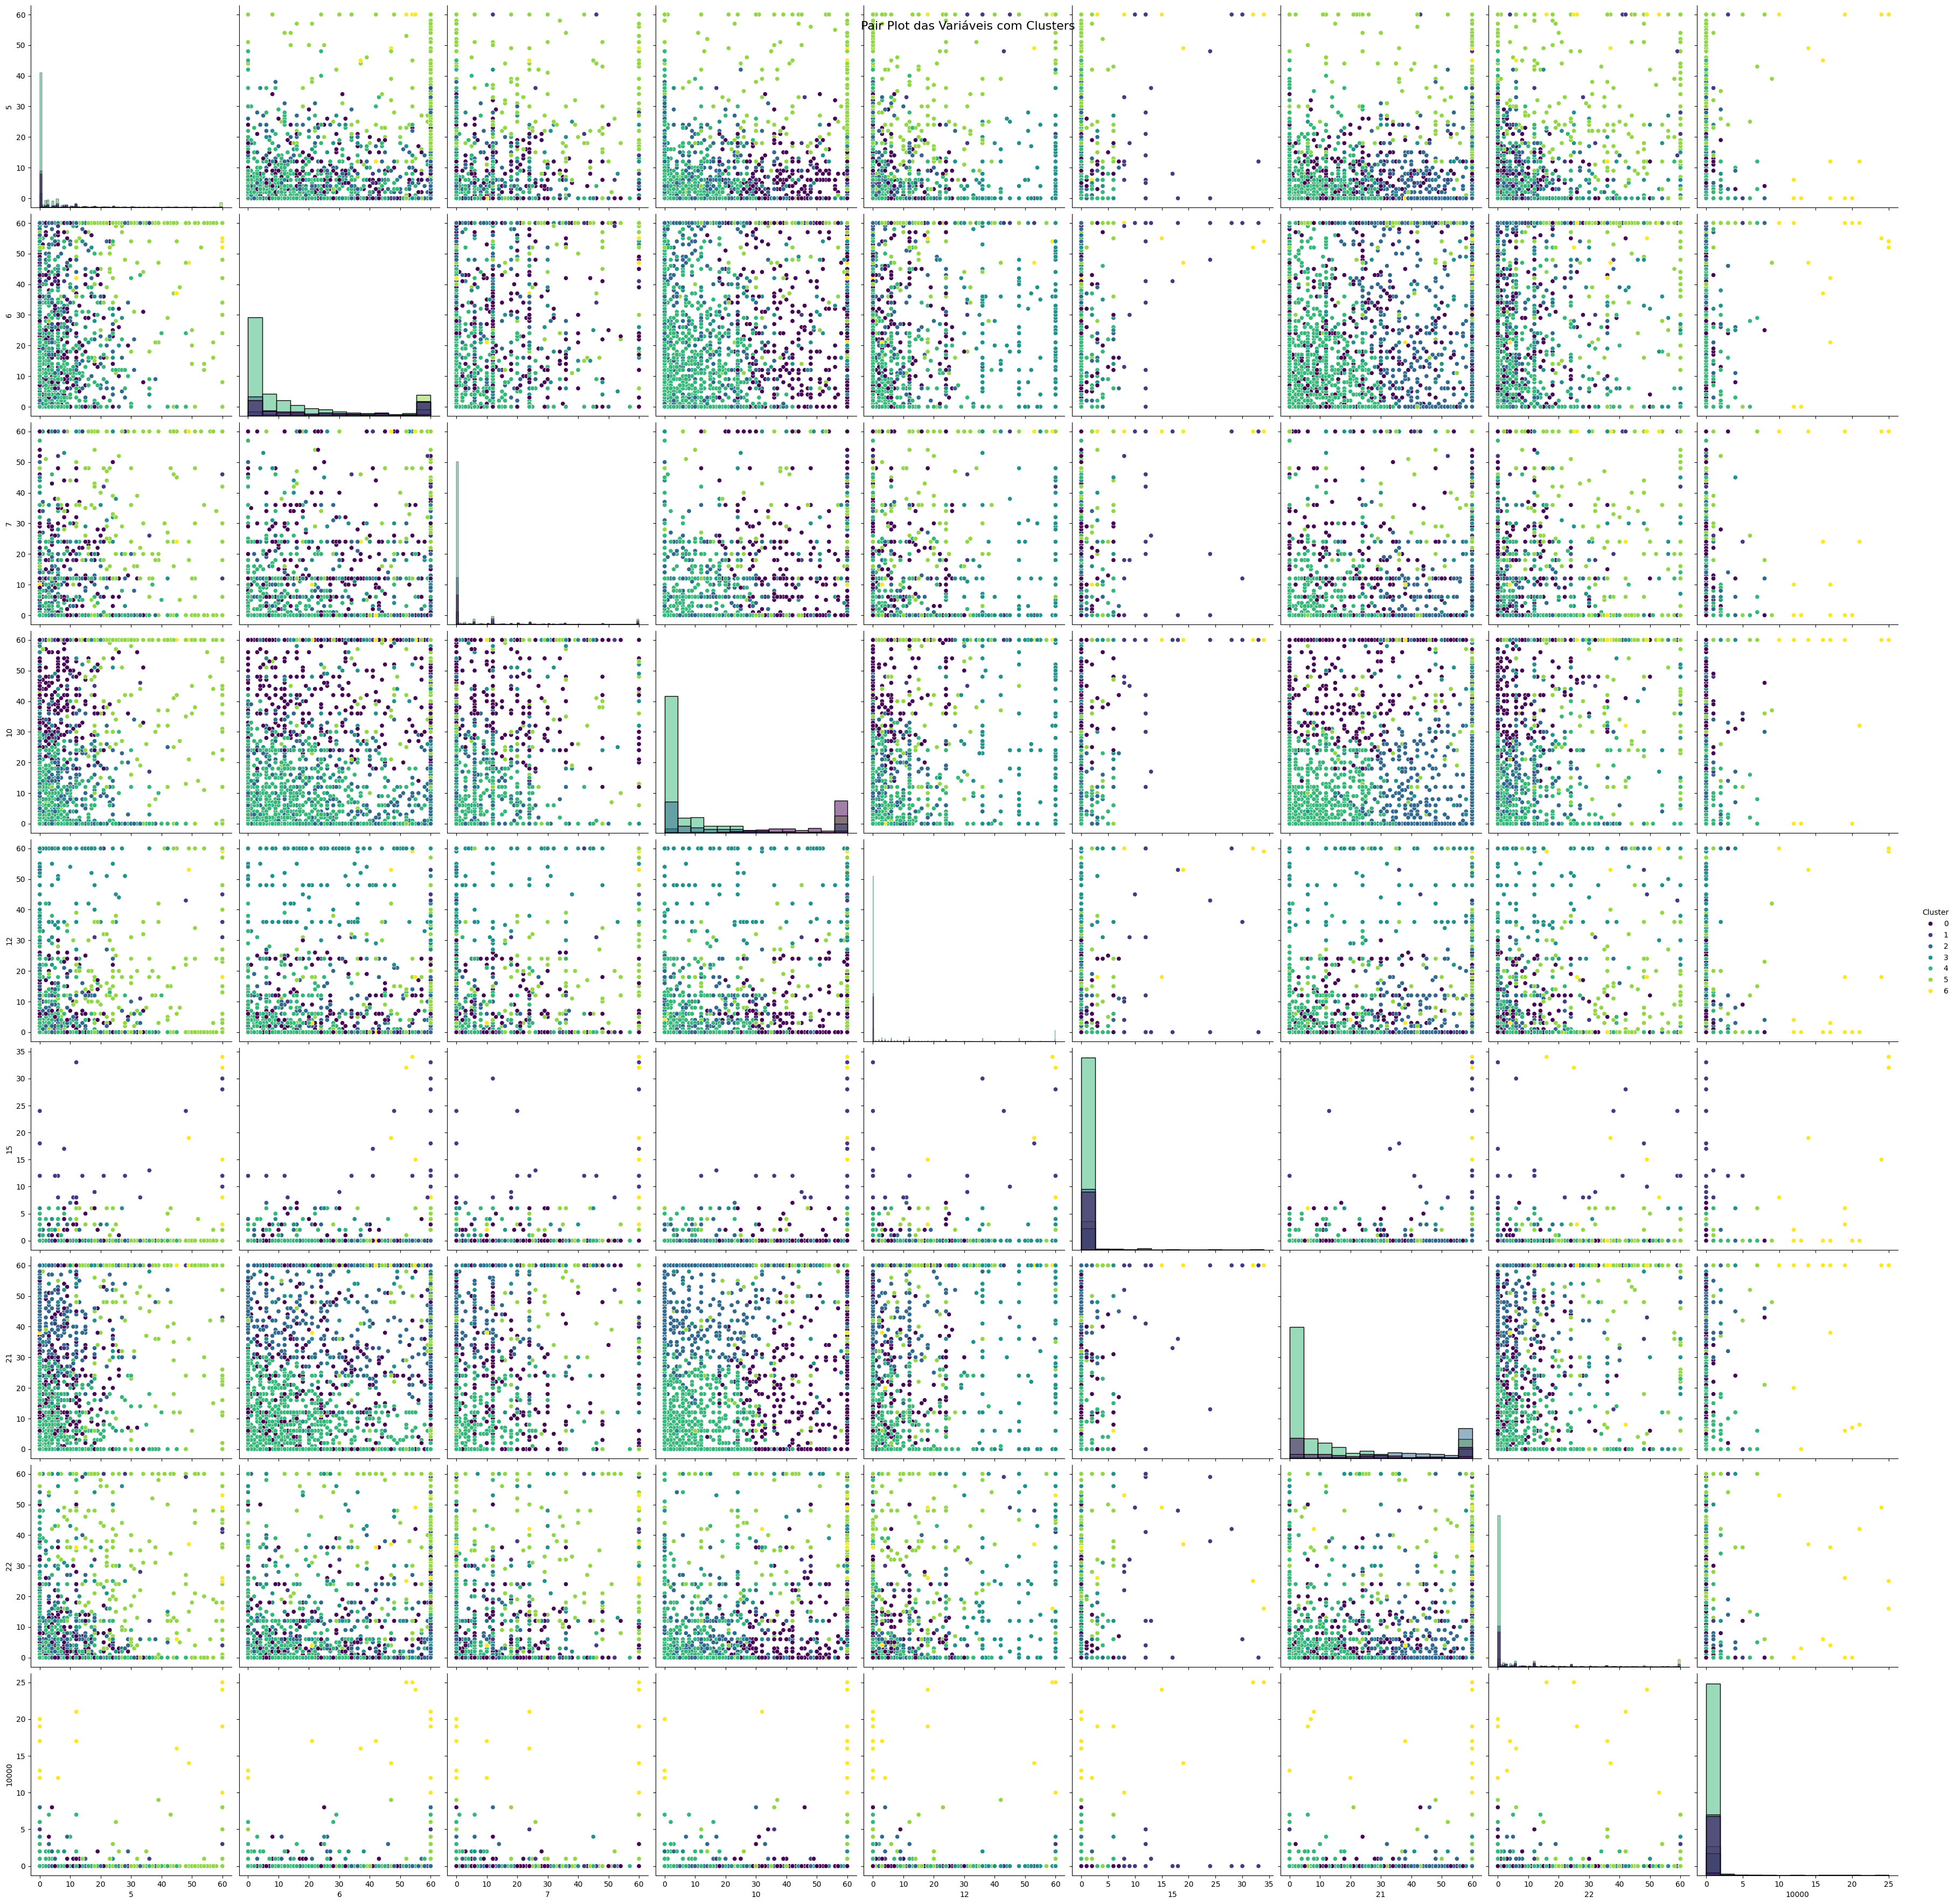

In [215]:
# Selecionando apenas duas colunas para o pair plot, além da coluna de cluster
columns_to_plot = [5,6,7,10,12,15,21,22,10000, 'Cluster']
subset_data = pivot_table[columns_to_plot]

# Criando o pair plot para as duas colunas selecionadas
sns.pairplot(subset_data, hue='Cluster' , palette='viridis', diag_kind='hist', markers='o', height=4)
plt.suptitle('Pair Plot das Variáveis com Clusters', fontsize=16)
plt.show()

id_cliente
16       0.0
47       0.0
75       3.0
126      0.0
265      0.0
        ... 
55857    0.0
55859    0.0
55865    0.0
55870    0.0
55873    0.0
Name: 10000, Length: 3764, dtype: float64

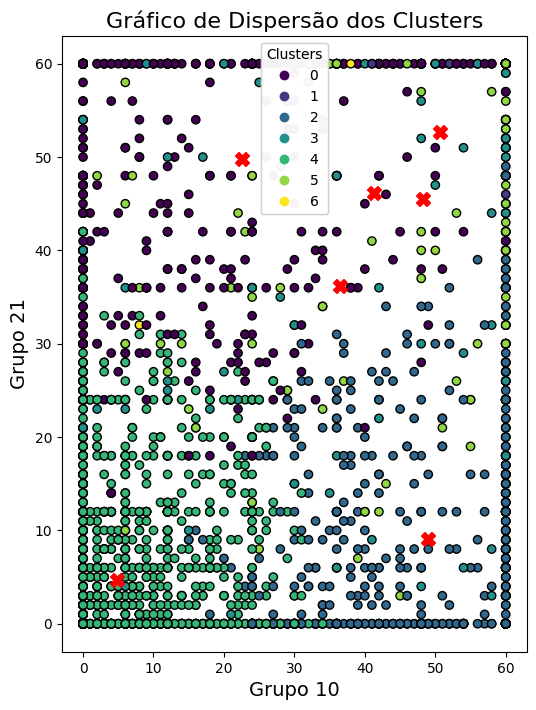

In [225]:
x = pivot_table[21]  
y =  pivot_table[10] 

plt.figure(figsize=(6, 8))

# Criando o scatter plot
scatter = plt.scatter(x, y, c=pivot_table['Cluster'], cmap='viridis', edgecolor='k')
# Adicionando os centros dos clusters
centers_x = cluster_centers_original[:, 6]  # Centro dos clusters para a coluna '21'
centers_y = cluster_centers_original[:, 3]  # Centro dos clusters para a coluna '10'
plt.scatter(centers_x, centers_y, c='red', marker='X', s=100, label='Centros dos Clusters')

# Adicionando rótulos e título
plt.title('Gráfico de Dispersão dos Clusters', fontsize=16)
plt.xlabel('Grupo 10', fontsize=14)
plt.ylabel('Grupo 21', fontsize=14)

# Adicionando legenda
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.grid(False)
plt.show()

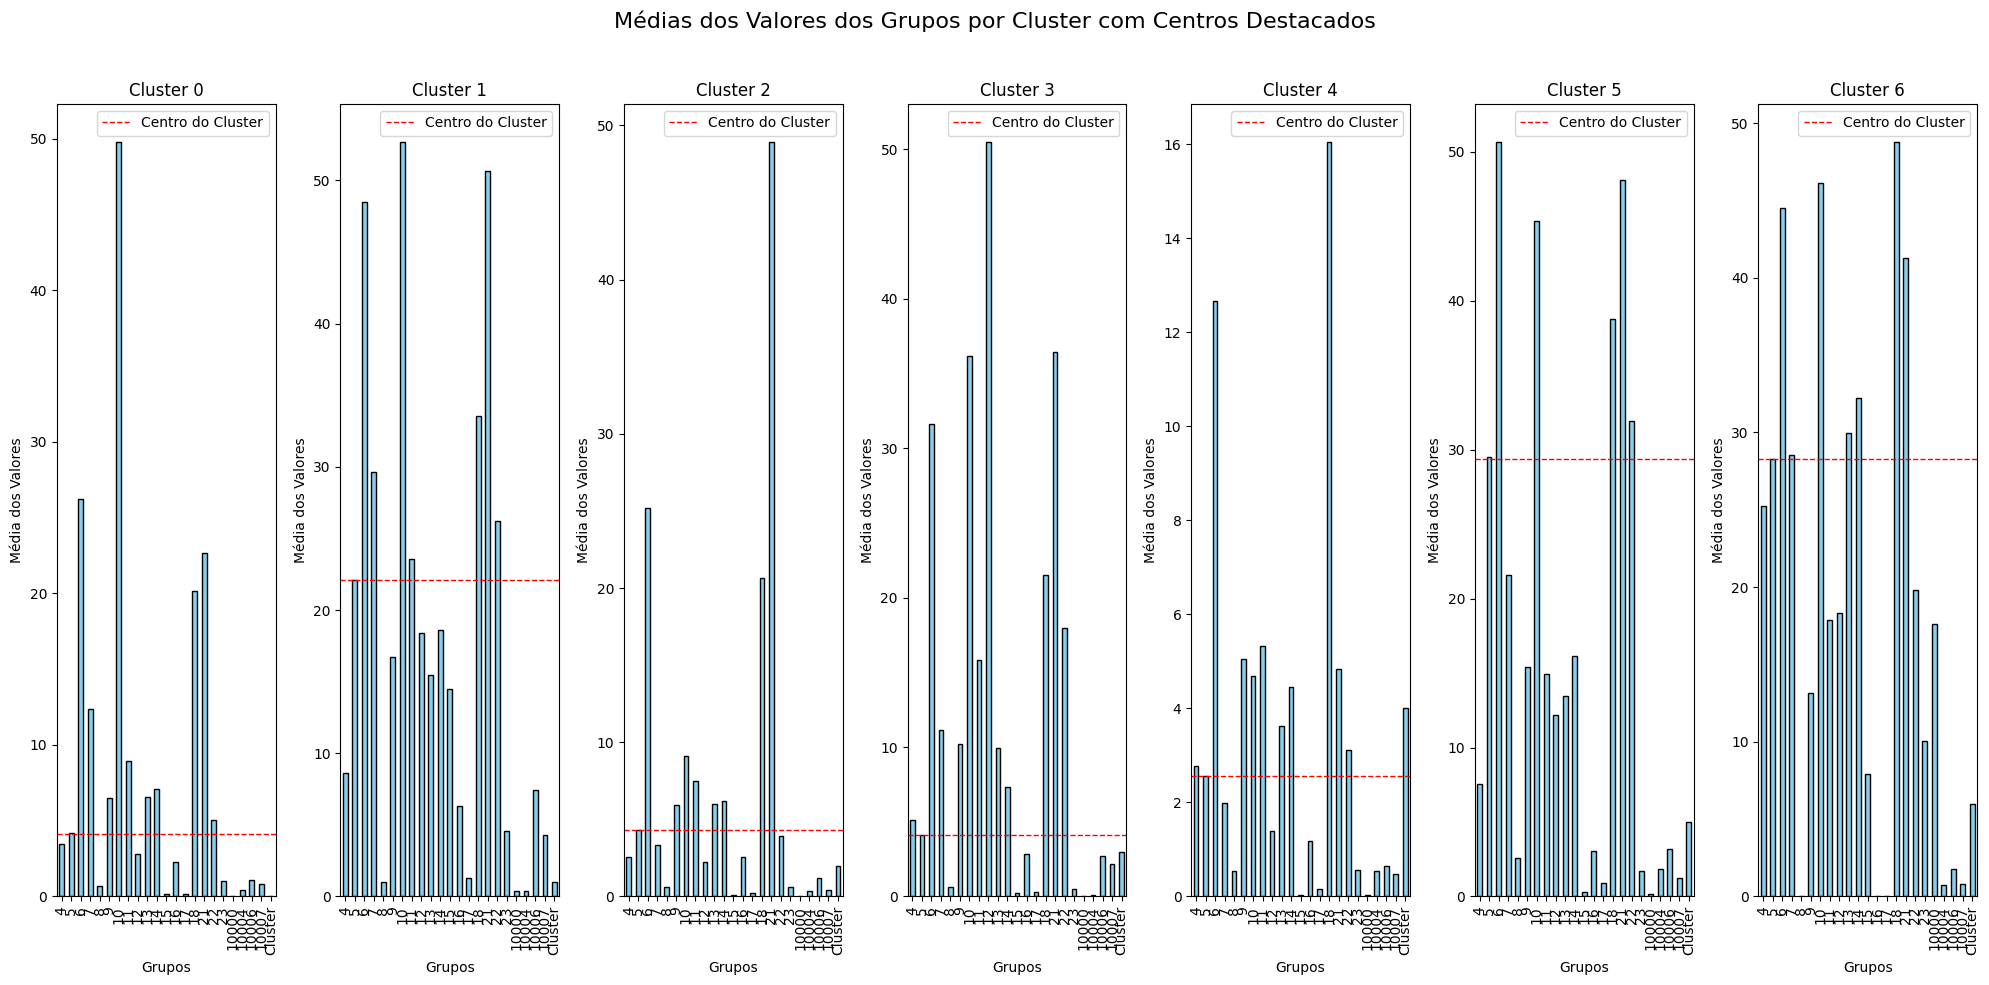

In [217]:

# Plotando os gráficos de barras para cada cluster com os centros destacados
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 10))

for i, ax in enumerate(axes):
    # Dados do cluster atual
    cluster_data = pivot_table[pivot_table['Cluster'] == i]
    cluster_center = cluster_centers_original[i]

    # Plotando os valores médios dos grupos
    cluster_data.mean().plot(kind='bar', ax=ax, color='skyblue', edgecolor='black',  sharex=True)

    # Destacando os centros dos clusters
    ax.axhline(y=cluster_center[0], color='red', linestyle='--', linewidth=1, label='Centro do Cluster')

    # Configurando o gráfico
    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('Grupos')
    ax.set_ylabel('Média dos Valores')
    ax.legend()

plt.suptitle('Médias dos Valores dos Grupos por Cluster com Centros Destacados', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()